In [13]:
import pandas as pd

# Load your datasets
df1 = pd.read_csv('2014.csv')
df2 = pd.read_csv('2015.csv')
df3 = pd.read_csv('2016.csv')
df4 = pd.read_csv('2017.csv')
df5 = pd.read_csv('2018.csv')
df6 = pd.read_csv('2019.csv')
df7 = pd.read_csv('2020.csv')
df8 = pd.read_csv('2021.csv')
df9 = pd.read_csv('2022.csv')
df10 = pd.read_csv('2023.csv')
df11 = pd.read_csv('2024.csv')

# Append all datasets
combined_df = pd.concat([df1, df2, df3, df4, df5,df6, df7, df8, df9, df10, df11], ignore_index=True)

# Save the combined dataset if needed
combined_df.to_csv('Air Quality.csv', index=False)

In [16]:
data = pd.read_csv('Air Quality.csv')
data.describe()

C:\Users\EZENWAJIAKU CHINEDU\AppData\Local\Temp\ipykernel_9668\2529471597.py:1: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Air Quality.csv')


,PM10,M_DIR,M_SPED,M_T,NO,NO2,NOXasNO2,O3,PM25,NV25,V25
count,50211.000000,87792.000000,87792.000000,87792.000000,88061.000000,87959.000000,87963.000000,88503.000000,86608.000000,36411.000000,36411.000000
mean,11.459271,203.985893,4.547689,9.085036,6.732811,17.785650,28.121532,48.389412,8.679068,8.543869,3.200019
std,7.664366,92.964922,2.406477,5.616589,16.619539,14.861856,36.445026,24.126747,7.840201,7.378663,2.958636
min,0.375000,0.000000,0.000000,-6.900000,-0.235160,-1.005980,0.614700,-1.130900,-3.900000,-4.700000,-6.400000
25%,6.525000,142.375000,2.800000,5.100000,1.059380,7.584450,10.557090,32.829270,3.962000,4.200000,1.400000
50%,9.575000,226.000000,4.100000,8.900000,2.802160,12.856300,17.304660,50.141960,6.400000,6.600000,2.700000
75%,14.200000,265.700000,5.900000,13.000000,5.607310,23.155705,31.101020,64.610790,10.600000,10.400000,4.400000
max,133.350000,360.000000,20.200000,30.300000,385.912880,208.644670,708.036670,171.680090,221.400000,214.000000,30.200000


In [17]:
import numpy as np
from datetime import datetime


# Step 1: Remove rows with null values in critical columns
df = data.dropna(subset=['End Date', 'End Time'])

# Step 2: Convert 'End Date' to datetime format
df['End Date'] = pd.to_datetime(df['End Date'], format='%d/%m/%Y', errors='coerce')

# Step 3: Remove rows with future dates
current_date = datetime.now()
df = df[df['End Date'] <= current_date]

# Step 4: Convert numeric columns to appropriate data types
numeric_columns = ['PM10', 'M_DIR', 'M_SPED', 'M_T', 'NO', 'NO2', 'NOXasNO2', 'O3', 'PM25', 'NV25', 'V25']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display information about the cleaned dataset
print("Cleaned dataset info:")
print(df.info())

C:\Users\EZENWAJIAKU CHINEDU\AppData\Local\Temp\ipykernel_9668\3592552371.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['End Date'] = pd.to_datetime(df['End Date'], format='%d/%m/%Y', errors='coerce')


Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 89568 entries, 0 to 89587
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   End Date         89568 non-null  datetime64[ns]
 1   End Time         89568 non-null  object        
 2   PM10             50211 non-null  float64       
 3   Status/units     84675 non-null  object        
 4   M_DIR            87792 non-null  float64       
 5   Status/units.1   87792 non-null  object        
 6   M_SPED           87792 non-null  float64       
 7   Status/units.2   87792 non-null  object        
 8   M_T              87792 non-null  float64       
 9   Status/units.3   87888 non-null  object        
 10  NO               88061 non-null  float64       
 11  Status/units.4   87960 non-null  object        
 12  NO2              87959 non-null  float64       
 13  Status/units.5   87959 non-null  object        
 14  NOXasNO2         8796

In [19]:
# Remove Status/units columns
columns_to_keep = [col for col in df.columns if 'Status/units' not in col]
df = df[columns_to_keep]

# Display info about the dataframe
print(df.info())

# Display the number of null values in each column
print("\
Null values in each column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 89568 entries, 0 to 89587
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   End Date  89568 non-null  datetime64[ns]
 1   End Time  89568 non-null  object        
 2   PM10      50211 non-null  float64       
 3   M_DIR     87792 non-null  float64       
 4   M_SPED    87792 non-null  float64       
 5   M_T       87792 non-null  float64       
 6   NO        88061 non-null  float64       
 7   NO2       87959 non-null  float64       
 8   NOXasNO2  87963 non-null  float64       
 9   O3        88503 non-null  float64       
 10  PM25      86608 non-null  float64       
 11  NV25      36411 non-null  float64       
 12  V25       36411 non-null  float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 9.6+ MB
None
Null values in each column:
End Date        0
End Time        0
PM10        39357
M_DIR        1776
M_SPED       1776
M_T        

In [20]:
# Fill null values with mean for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Check if there are any remaining null values
print("Remaining null values after filling with mean:")
print(df.isnull().sum())

df.describe()

Remaining null values after filling with mean:
End Date    0
End Time    0
PM10        0
M_DIR       0
M_SPED      0
M_T         0
NO          0
NO2         0
NOXasNO2    0
O3          0
PM25        0
NV25        0
V25         0
dtype: int64


,End Date,PM10,M_DIR,M_SPED,M_T,NO,NO2,NOXasNO2,O3,PM25,NV25,V25
count,89568,89568.000000,89568.000000,89568.000000,89568.000000,89568.000000,89568.000000,89568.000000,89568.000000,89568.000000,89568.000000,89568.000000
mean,2020-01-27 05:38:00.385852160,11.459271,203.985893,4.547689,9.085036,6.732811,17.785650,28.121532,48.389412,8.679068,8.543869,3.200019
min,2015-01-01 00:00:00,0.375000,0.000000,0.000000,-6.900000,-0.235160,-1.005980,0.614700,-1.130900,-3.900000,-4.700000,-6.400000
25%,2017-07-21 18:00:00,8.850000,146.200000,2.800000,5.200000,1.084840,7.665780,10.666970,33.078730,4.033000,8.000000,3.200019
50%,2020-02-09 12:00:00,11.459271,224.300000,4.200000,9.085036,2.869010,13.130015,17.615130,49.792720,6.600000,8.543869,3.200019
75%,2022-08-30 06:00:00,11.459271,264.600000,5.800000,12.900000,5.863767,22.871335,30.717025,64.411220,10.400000,8.543869,3.200019
max,2024-08-10 00:00:00,133.350000,360.000000,20.200000,30.300000,385.912880,208.644670,708.036670,171.680090,221.400000,214.000000,30.200000
std,NaN,5.738486,92.038619,2.382498,5.560626,16.479131,14.727761,36.117011,23.982878,7.709562,4.704506,1.886374


In [22]:
# Replace '24:00:00' with '00:00:00' and adjust the date accordingly

# Create a mask for the problematic times
mask = df['End Time'] == '24:00:00'

# Adjust the 'End Date' for these rows
# Convert 'End Date' to datetime to facilitate the adjustment

df['End Date'] = pd.to_datetime(df['End Date'])

# Increment the date by one day for the problematic rows

# Update the End Time

df.loc[mask, 'End Time'] = '00:00:00'

# Increment the End Date by one day

df.loc[mask, 'End Date'] += pd.Timedelta(days=1)

# Now, combine 'End Date' and 'End Time' into a single datetime column

df['Datetime'] = pd.to_datetime(df['End Date'].dt.strftime('%Y-%m-%d') + ' ' + df['End Time'])

# Set the new datetime column as the index

df.set_index('Datetime', inplace=True)

# Drop the original date and time columns
df.drop(columns=['End Date', 'End Time'], inplace=True)

# Display the head of the modified datafram
df.head()

,PM10,M_DIR,M_SPED,M_T,NO,NO2,NOXasNO2,O3,PM25,NV25,V25
Datetime,,,,,,,,,,,
2024-01-01 01:00:00,5.750,262.5,8.1,5.7,0.72889,1.46972,2.58734,68.31946,3.609,8.543869,3.200019
2024-01-01 02:00:00,4.825,259.0,8.3,5.6,1.36667,2.10015,4.19568,69.71645,2.736,8.543869,3.200019
2024-01-01 03:00:00,4.350,270.2,8.1,5.8,0.95667,1.36521,2.83208,67.95359,2.500,8.543869,3.200019
2024-01-01 04:00:00,4.400,265.9,7.0,5.5,0.71750,1.36481,2.46496,65.70842,2.359,8.543869,3.200019
2024-01-01 05:00:00,4.800,260.9,6.7,4.9,0.75167,1.05019,2.20273,64.36133,2.264,8.543869,3.200019


In [23]:
# Save the cleaned dataset
df.to_csv('cleaned_air_quality.csv', index=False)

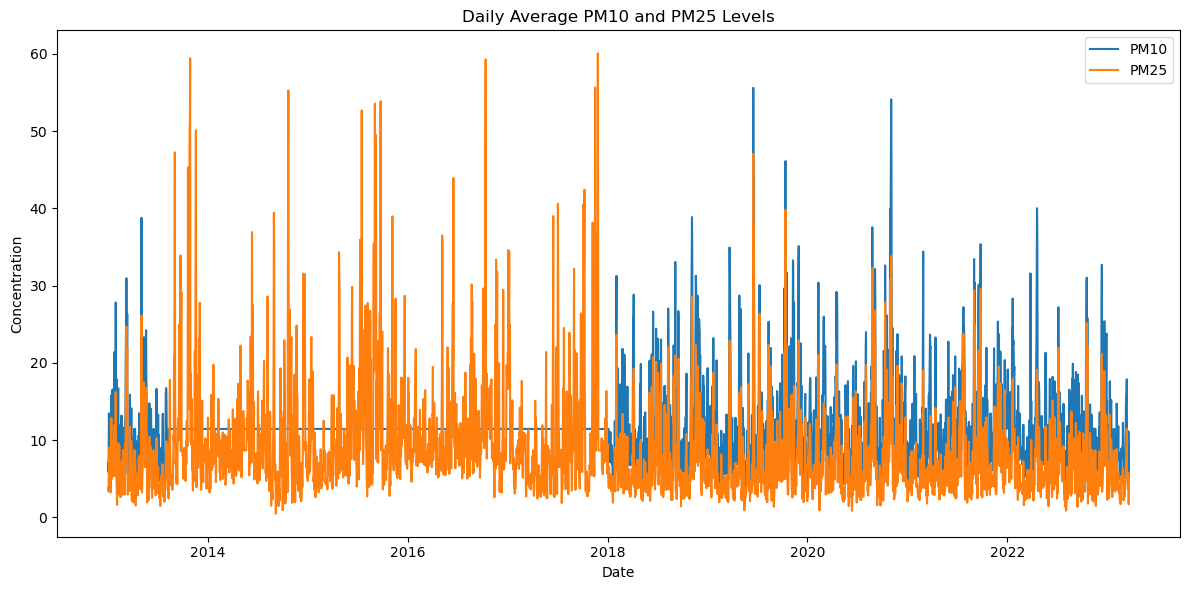

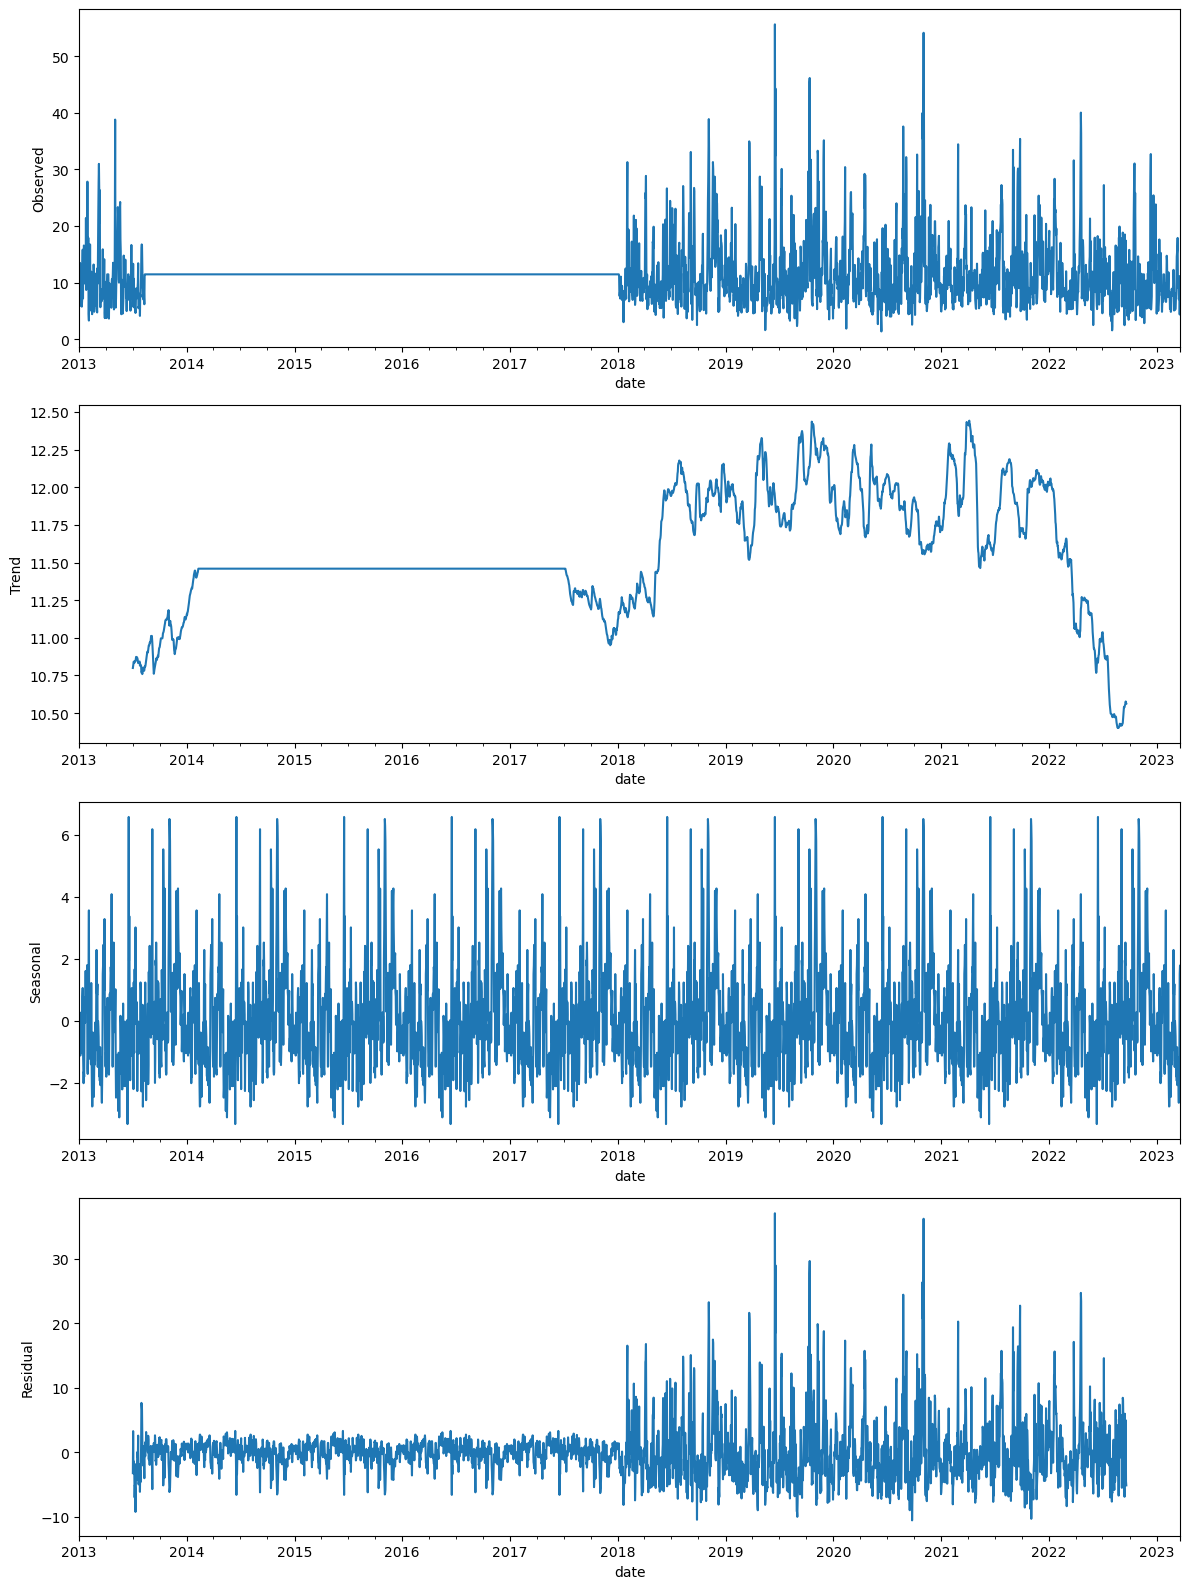

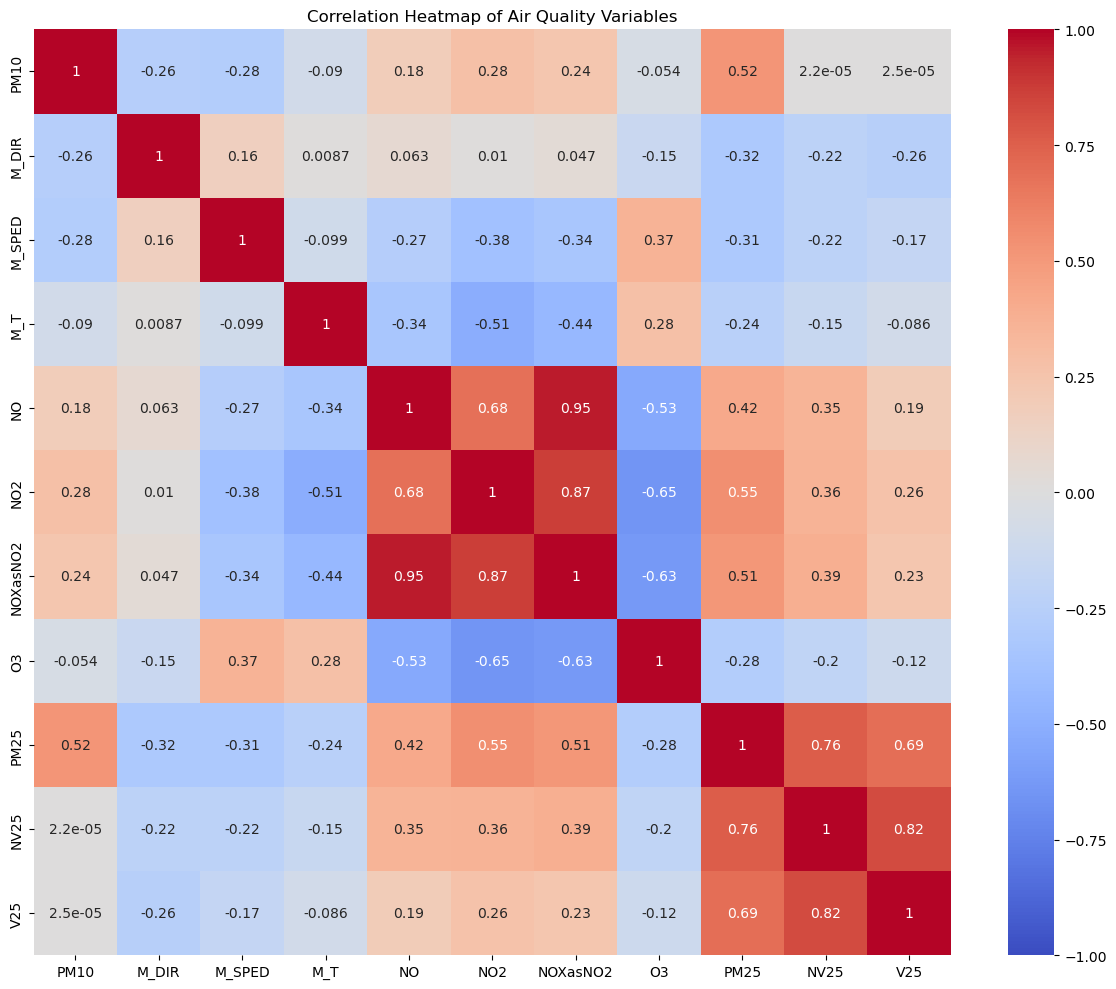

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime, timedelta


# Create a datetime index
start_date = datetime(2013, 1, 1)  # Assuming the data starts from 2013-01-01
df['date'] = [start_date + timedelta(hours=i) for i in range(len(df))]
df.set_index('date', inplace=True)

# Resample the data to daily frequency
df_daily = df.resample('D').mean()

# Plot time series for PM10 and PM25
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['PM10'], label='PM10')
plt.plot(df_daily.index, df_daily['PM25'], label='PM25')
plt.title('Daily Average PM10 and PM25 Levels')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.tight_layout()
plt.show()

# Perform seasonal decomposition on PM10
result = seasonal_decompose(df_daily['PM10'], model='additive', period=365)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

# Calculate correlation matrix
correlation_matrix = df_daily.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Air Quality Variables')
plt.tight_layout()
plt.show()

ADF Statistic: -8.951915917084767
p-value: 8.677527629094401e-15
ADF Statistic after differencing: -18.4284136437502
p-value after differencing: 2.170568943084059e-30


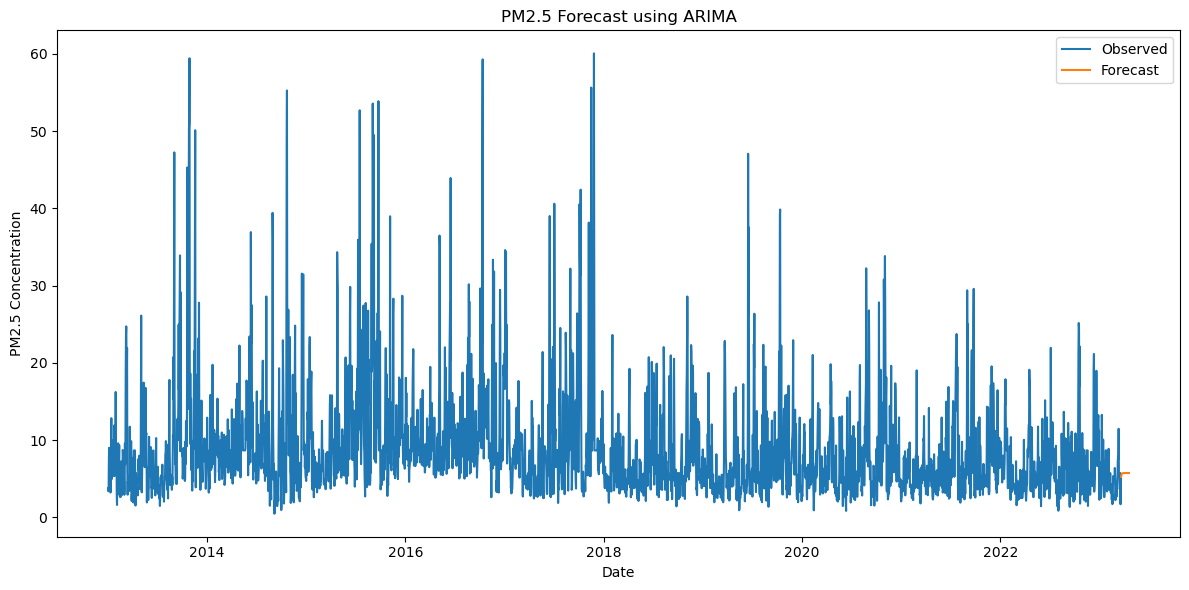

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


# Create a datetime index
start_date = datetime(2013, 1, 1)  # Assuming the data starts from 2013-01-01
df['date'] = [start_date + timedelta(hours=i) for i in range(len(df))]
df.set_index('date', inplace=True)

# Resample the data to daily frequency
df_daily = df.resample('D').mean()

# Select PM2.5 for modeling
pm25 = df_daily['PM25'].dropna()

# Check for stationarity using Augmented Dickey-Fuller test
adf_result = adfuller(pm25)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# Differencing to make the series stationary if needed
pm25_diff = pm25.diff().dropna()

# Check stationarity again
adf_result_diff = adfuller(pm25_diff)
print('ADF Statistic after differencing:', adf_result_diff[0])
print('p-value after differencing:', adf_result_diff[1])

# Fit ARIMA model
model = ARIMA(pm25_diff, order=(1, 0, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=30)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(pm25.index, pm25, label='Observed')
plt.plot(pm25.index[-1] + pd.to_timedelta(np.arange(1, 31), 'D'), forecast.cumsum() + pm25.iloc[-1], label='Forecast')
plt.title('PM2.5 Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.tight_layout()
plt.show()
